In [1]:
import igraph

In [2]:
import numpy as np
from igraph import *
from matplotlib import pyplot as plt

In [3]:
g =Graph.Read_GML("graph4.gml")

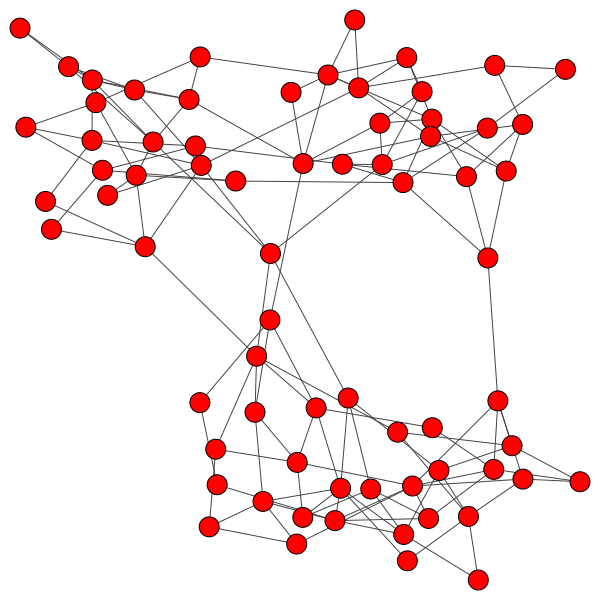

In [4]:
layout = g.layout("fr")
plot(g, layout = layout)

In [5]:
save = "./plot/"

In [6]:
cluster = g.community_edge_betweenness()
cluster.optimal_count
member_list = cluster.as_clustering().membership
member_list = np.array(member_list)

# (r start from, python from id 0)
degree = g.degree()
hub = np.where(np.array(degree)>=7)[0]
hub

array([ 7, 43, 46], dtype=int64)

In [12]:
cluster.optimal_count

6

In [8]:
member_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 4, 5, 5, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 4,
       4, 4, 4, 5])

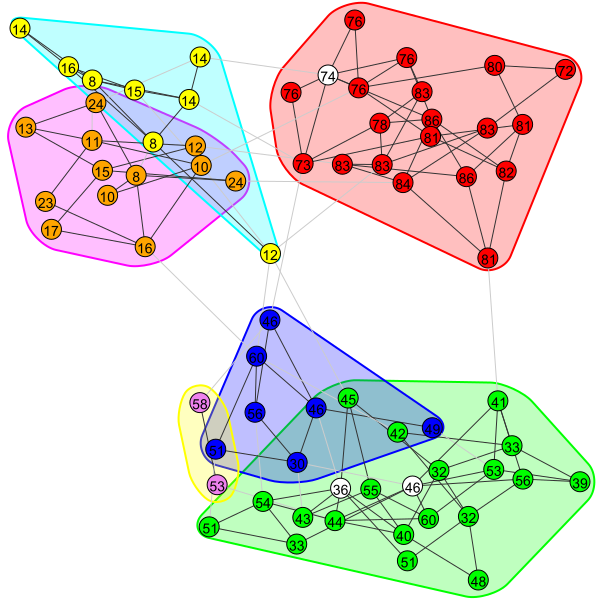

In [11]:
color_dict = {0:"red",1:"green", 2:"blue", 3:"violet", 4:"orange", 5:"yellow"}

vertex_color = [color_dict[n] for n in member_list]
for h in hub:
    vertex_color[h] = "white"

# age graph
plot(cluster.as_clustering(), mark_groups = True, layout=layout,
     vertex_label=[int(n) for n in g.vs["age"]], vertex_label_color="black", vertex_color=vertex_color,
    vertex_size=20)

#path = save + "graphbyage.png"
#p.save(path)
#p

In [13]:
age = np.array(g.vs["age"], dtype=np.int)
cluster0_age = age[member_list==0]
min_max_0 = (np.min(cluster0_age),np.max(cluster0_age))
cluster1_age = age[member_list==1]
min_max_1 = (np.min(cluster1_age),np.max(cluster1_age))
cluster2_age = age[member_list==2]
min_max_2 = (np.min(cluster2_age),np.max(cluster2_age))

cluster3_age = age[member_list==3]
min_max_3 = (np.min(cluster3_age),np.max(cluster3_age))
cluster4_age = age[member_list==4]
min_max_4 = (np.min(cluster4_age),np.max(cluster4_age))
cluster5_age = age[member_list==5]
min_max_5 = (np.min(cluster5_age),np.max(cluster5_age))

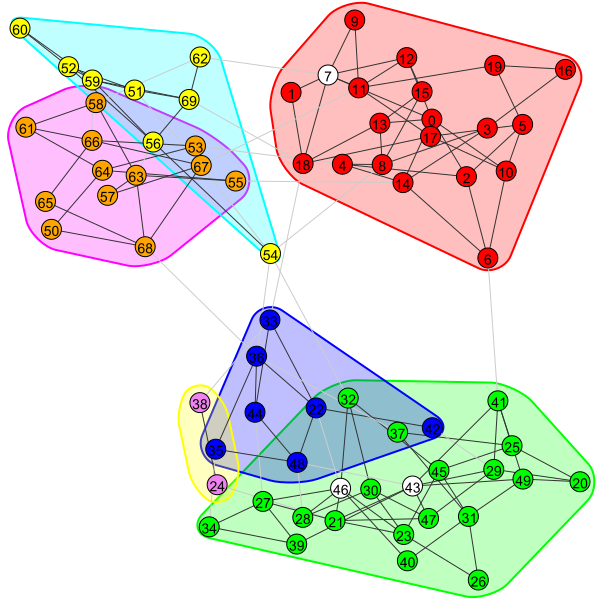

In [14]:
#id graph
plot(cluster.as_clustering(), mark_groups = True, layout=layout,
     vertex_label=[int(n) for n in g.vs["id"]], vertex_label_color="black", vertex_color=vertex_color,
    vertex_size=20)

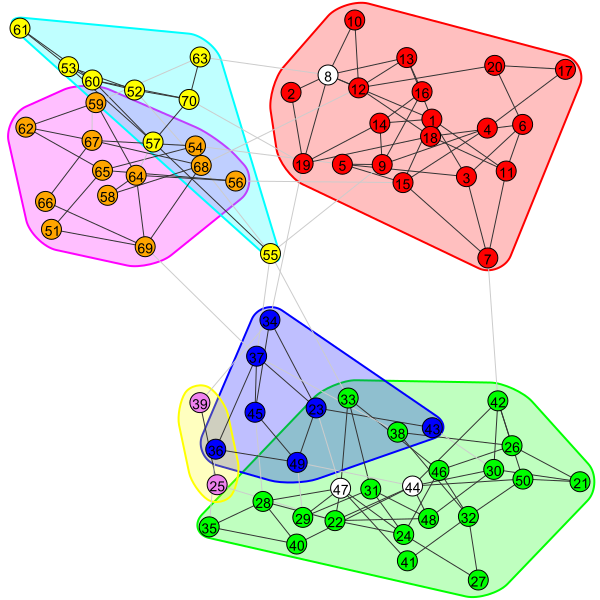

In [15]:
#name graph
plot(cluster.as_clustering(), mark_groups = True, layout=layout,
     vertex_label=[int(n) for n in g.vs["name"]], vertex_label_color="black", vertex_color=vertex_color,
    vertex_size=20)

In [16]:
nsimulation = 1000
max_t = 50
starting_point = 42

# mean number of infected over time
p_sim = np.zeros((70,max_t))
# mean probability of infection over time 
p_sim2 = np.zeros((70,max_t))
adj = g.get_adjacency()


for s in range(0,nsimulation):
    infected = [starting_point]
    noinf = np.zeros((70,70))
    noinf[infected[0], :] = 1
    p_hist = np.zeros((70,max_t))
    p_hist[infected[0], 0] = 1
    
    p_hist2 = np.zeros((70,max_t))
    p_hist2[infected[0], 0] = 1
    for t in range(1,max_t):
        for i in infected:
            noinf[i, :] = 1
            noinf[:,i] = adj[:,i]
        temp = np.sum(noinf, axis=1, keepdims=True)
        p = temp*0.2
        p[temp >=5] = 1
        u = np.random.uniform(0,1,(70,1))
        new = u <= p
        infected = np.where(new==True)[0]
        p_hist[:,t] = new[:,0]
        p_hist2[:,t] = p[:,0]
    
    p_sim = p_sim + p_hist
    p_sim2 = p_sim2 + p_hist2

p_sim = p_sim / nsimulation
p_sim2 = p_sim2 / nsimulation

In [17]:
psim_cluster0 = p_sim[member_list==0,:]
psim_cluster1 = p_sim[member_list==1,:]
psim_cluster2 = p_sim[member_list==2,:]

mean_inf_cluster0 = np.sum(psim_cluster0,axis=0,keepdims=True)/psim_cluster0.shape[0]
mean_inf_cluster1 = np.sum(psim_cluster1,axis=0,keepdims=True)/psim_cluster1.shape[0]
mean_inf_cluster2 = np.sum(psim_cluster2,axis=0,keepdims=True)/psim_cluster2.shape[0]

max_time_0 = np.argmax(mean_inf_cluster0)
max_time_1 = np.argmax(mean_inf_cluster1)
max_time_2 = np.argmax(mean_inf_cluster2)

print(max_time_0)
print(max_time_1)
print(max_time_2)

42
30
27


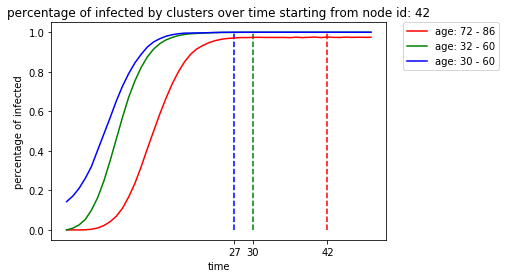

In [19]:
label0 = "age: " + str(min_max_0[0]) + " - " + str(min_max_0[1])
label1 = "age: " + str(min_max_1[0]) + " - " + str(min_max_1[1])
label2 = "age: " + str(min_max_2[0]) + " - " + str(min_max_2[1])

plt.plot(mean_inf_cluster0.T, color="red", label=label0)
plt.plot(mean_inf_cluster1.T, color="green", label=label1)
plt.plot(mean_inf_cluster2.T, color="blue", label=label2)

plt.vlines(max_time_0,0,1,colors="red", linestyles="dashed")
plt.vlines(max_time_1,0,1,colors="green", linestyles="dashed")
plt.vlines(max_time_2,0,1,colors="blue", linestyles="dashed")

plt.xlabel("time")
plt.ylabel("percentage of infected")
plt.title("percentage of infected by clusters over time starting from node id: " + str(starting_point))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks([max_time_0,max_time_1,max_time_2]);



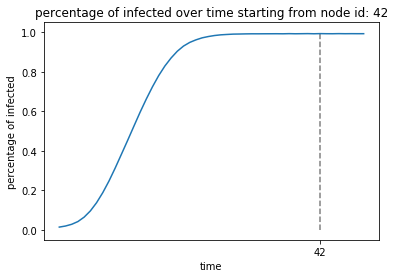

In [20]:
# percentuale infezioni medie su tutto il grafo nel tempo su 200 simulazioni

mean_inf = np.sum(p_sim,axis=0,keepdims=True)/p_sim.shape[0]
max_time_all_inf = np.argmax(mean_inf)
plt.plot(mean_inf.T)

plt.xlabel("time")
plt.ylabel("percentage of infected")
plt.title("percentage of infected over time starting from node id: " + str(starting_point))

plt.vlines(max_time_all_inf,0,1,colors="grey", linestyles="dashed")
plt.xticks([max_time_all_inf]);
